<a href="https://colab.research.google.com/github/saeedabi1/Deep_Learning_CMPE_258/blob/master/assignment_1_a_Linear_Regression_problem_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning - Mirsaeid Abolghasemi - Lesson 2 - Linear Regression problem

In [0]:
%matplotlib inline
from fastai.basics import *

In [25]:
n = 200
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:20]

tensor([[-0.6442,  1.0000],
        [-0.5739,  1.0000],
        [ 0.0783,  1.0000],
        [-0.3127,  1.0000],
        [ 0.6938,  1.0000],
        [-0.9925,  1.0000],
        [-0.2663,  1.0000],
        [-0.5735,  1.0000],
        [ 0.0683,  1.0000],
        [-0.5137,  1.0000],
        [-0.9839,  1.0000],
        [ 0.4425,  1.0000],
        [-0.5895,  1.0000],
        [-0.7051,  1.0000],
        [ 0.7956,  1.0000],
        [ 0.1506,  1.0000],
        [-0.1893,  1.0000],
        [ 0.8031,  1.0000],
        [-0.5930,  1.0000],
        [ 0.0912,  1.0000]])

In [26]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

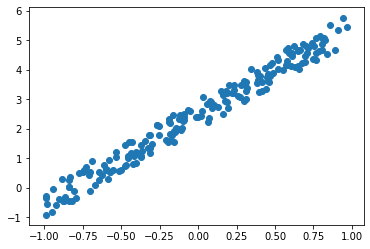

In [28]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [31]:
y_hat = x@a
mse(y_hat, y)

tensor(7.0977)

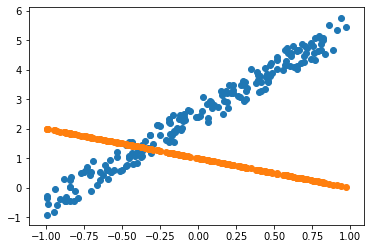

In [32]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [33]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [35]:
lr = 1e-1
for t in range(100): update()

tensor(7.0977, grad_fn=<MeanBackward0>)
tensor(1.5392, grad_fn=<MeanBackward0>)
tensor(0.4972, grad_fn=<MeanBackward0>)
tensor(0.1989, grad_fn=<MeanBackward0>)
tensor(0.1117, grad_fn=<MeanBackward0>)
tensor(0.0862, grad_fn=<MeanBackward0>)
tensor(0.0787, grad_fn=<MeanBackward0>)
tensor(0.0765, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)
tensor(0.0757, grad_fn=<MeanBackward0>)


In [0]:
#will show an error:RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);


In [0]:
#will show an error:RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)